# Mnist Fashion Classification Using CNN

In [1]:
import tensorflow as tf
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Flatten
from keras.layers import Dense
import pandas as pd
import numpy  as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the data
(X_train,Y_train),(X_test,Y_test) = fashion_mnist.load_data()

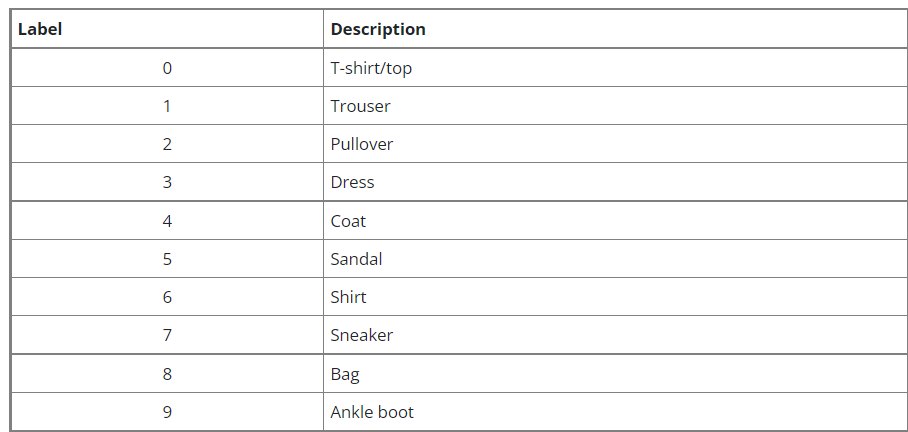

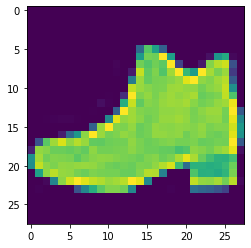

In [3]:
plt.imshow(X_train[15]);

In [4]:
print(Y_train[15])

9


In [5]:
#reshaping the data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))

In [6]:
#Normalizing the data
X_train= X_train/255
X_test= X_test/255

# Model Building.

In [11]:
#defining model
model=Sequential()
#adding convolution layer
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#adding pooling layer
model.add(MaxPool2D(2,2))
#adding fully connected layer
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
#adding output layer
model.add(Dense(10,activation='softmax'))
#compiling the model
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.fit(X_train,Y_train,epochs=15)

Epoch 1/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4003 - accuracy: 0.8567
Epoch 2/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.2642 - accuracy: 0.9034
Epoch 3/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.2238 - accuracy: 0.9168
Epoch 4/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1917 - accuracy: 0.9282
Epoch 5/15
1875/1875 [==============================] - 23s 12ms/step - loss: 0.1690 - accuracy: 0.9364
Epoch 6/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1454 - accuracy: 0.9455
Epoch 7/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.1287 - accuracy: 0.9525
Epoch 8/15
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1121 - accuracy: 0.9589
Epoch 9/15
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0972 - accuracy: 0.9633
Epoch 10/15
1875/1875 [==============================] - 25s 13m

In [13]:
#evaluting the model
model.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.5050 - accuracy: 0.9084


[0.5049912333488464, 0.9083999991416931]

In [17]:
#predicting
Y_pred = model.predict(X_test)  
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in Y_pred]
#print(Y_pred_labels)

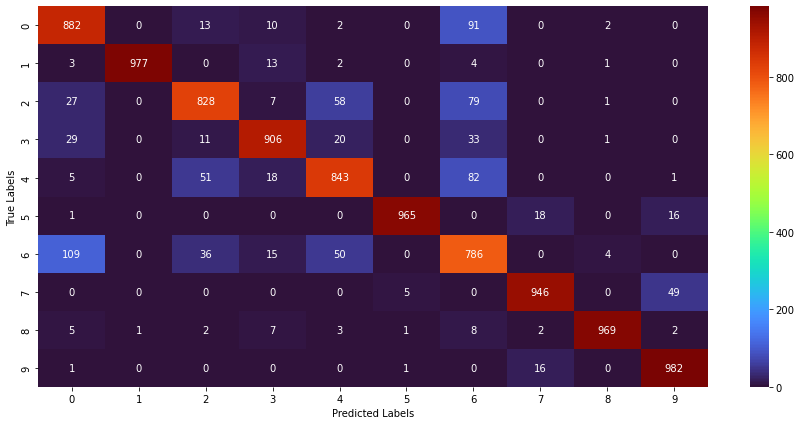

In [20]:
#Plotting a confusion Matrix
from tensorflow.math import confusion_matrix
CF = confusion_matrix(Y_test,Y_pred_labels)
plt.figure(figsize=(15,7))
sns.heatmap(CF, annot=True, fmt='d', cmap='turbo')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels');

Path of the image to be predicted: Fashion_MNIST.png
The Handwritten Digit is recognised as  0


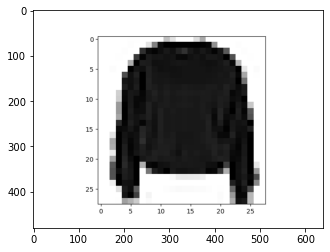

In [22]:

#predictive system
import cv2
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

plt.imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))

input_image_resize = input_image_resize/255

image_reshaped = np.reshape(input_image_resize, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as ', input_pred_label)